In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/annaywj/Downloads/office_supplies.csv")

In [3]:
data.head()

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,NaN
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0,NaN
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        8000 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.0+ KB


there are 9993 rows data, and there are 1993 rows missing value in Profit column

In [5]:
data['Ship Mode'].value_counts()

Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [6]:
data['Region'].value_counts()

West       3203
East       2848
Central    2322
South      1620
Name: Region, dtype: int64

In [7]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1846
Name: Category, dtype: int64

In [8]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          888
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [9]:
data['Discount'].value_counts()

0.00    4797
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64


### Change time format

In [10]:
def timechange(item):
    time = str(item)
    return pd.to_datetime(time,format='%Y-%m-%d')

data['Order Date']=data['Order Date'].apply(timechange)

In [11]:
import datetime
data['Month'] = data['Order Date'].dt.month
data['Month'] = data ['Order Date'].dt.strftime('%m')

data['Day'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.strftime ('%d')

In [12]:
data.head()

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Day
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN,12,12
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN,12,12
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,NaN,12,01
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0,NaN,12,01
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0,NaN,12,01


### What was the best month for sales?

In [13]:
df_month = data[['Month', 'Sales']]
grouped_month = df_month.groupby("Month").sum().sort_values ('Sales', ascending = False).head(12)
grouped_month

,Sales
Month,
11,352197.1110
12,325293.5035
09,307649.9457
03,205005.4888
10,200322.9847
08,159044.0630
05,155028.8117
06,152718.6793
07,147238.0970


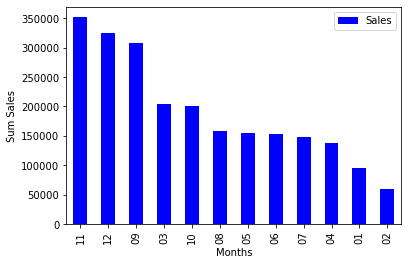

In [14]:
grouped_month.plot.bar (color = "b")
plt.ylabel ('Sum Sales')
plt.xlabel ('Months')
plt.show()

The sales volume is the highest in November and December , Sales were the lowest in January and February

### What Region sold the most product?

In [15]:
df_gpcity = data[['Region', 'Sales']]
grouped_city = df_gpcity.groupby (['Region']).sum().sort_values ('Sales', ascending = False).head (12)
grouped_city

,Sales
Region,
West,725457.8245
East,678781.2400
Central,500975.9308
South,391721.9050


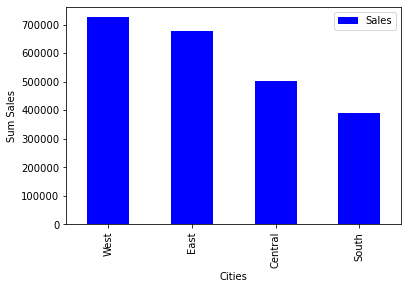

In [16]:
grouped_city.plot.bar (color = "b")
plt.ylabel ("Sum Sales")
plt.xlabel ("Cities")
plt.show ()

The western region sells the most products

### What time should we display advertisements to maximize the likelihood of customers buying product?

In [17]:
df_gpday = data[['Day', 'Sales']]
group_day = df_gpday.groupby("Day").count().sort_values("Day", ascending = False)

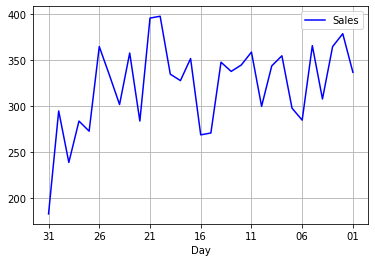

In [18]:
group_day.plot.line (color = "blue")
plt.ylabel = ("Count Sales")
plt.xlabel = ("Days")
plt.grid ()
plt.show()
# The best days for advertising is Early and middle of each month

### What categories are most often sold togather

In [19]:
data['Grouped'] = data.groupby ('Order ID') ['Category'].transform (lambda x:','.join(x))

In [20]:
data.head()

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Day,Grouped
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN,12,12,"Technology,Office Supplies"
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN,12,12,"Technology,Office Supplies"
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,NaN,12,01,"Technology,Furniture,Furniture"
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0,NaN,12,01,"Technology,Furniture,Furniture"
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0,NaN,12,01,"Technology,Furniture,Furniture"


In [21]:
data = data.drop_duplicates (subset=['Order ID','Grouped'])


In [22]:
from itertools import combinations
from collections import Counter

count = Counter ()

for row in data['Grouped']:
    row_list = row.split (',')
    count.update(Counter(combinations(row_list,3)))
for key, value in count.most_common(10):
    print (key,value)


('Office Supplies', 'Office Supplies', 'Office Supplies') 2066
('Office Supplies', 'Technology', 'Office Supplies') 708
('Office Supplies', 'Office Supplies', 'Furniture') 698
('Office Supplies', 'Office Supplies', 'Technology') 697
('Technology', 'Office Supplies', 'Office Supplies') 690
('Office Supplies', 'Furniture', 'Office Supplies') 683
('Furniture', 'Office Supplies', 'Office Supplies') 670
('Office Supplies', 'Furniture', 'Technology') 290
('Technology', 'Office Supplies', 'Furniture') 256
('Furniture', 'Office Supplies', 'Technology') 254


### Which region has the highest actual sales

In [23]:
data['Real_Sales'] = data['Sales'] *(1-data['Discount'])

In [24]:
total_sales_each_region = data.groupby(['Region']).sum()['Real_Sales']

In [25]:
total_sales_each_region

Region
Central    205571.109976
East       284489.471600
South      163290.561000
West       289058.030925
Name: Real_Sales, dtype: float64

### Which region has the highest actual profit

In [26]:
total_profit_each_region = data.groupby(['Region']).sum()['Profit']

In [27]:
total_profit_each_region

Region
Central     7162.6880
East       42748.1311
South      15530.9653
West       36524.1512
Name: Profit, dtype: float64

TypeError: 'str' object is not callable

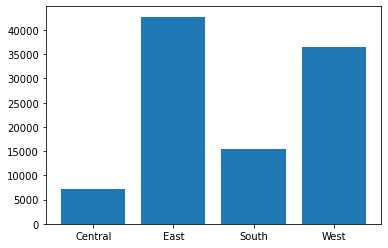

In [29]:
Region = ['Central', 'East', 'South', 'West']
plt.bar(Region, total_profit_each_region)
plt.xlabel('Region')
plt.ylabel('Total Profi')
plt.show()

In [30]:
total_quantity_each_region = data.groupby(['Region']).sum()['Quantity']
total_quantity_each_region

Region
Central    4517
East       5232
South      3142
West       6149
Name: Quantity, dtype: int64

TypeError: 'str' object is not callable

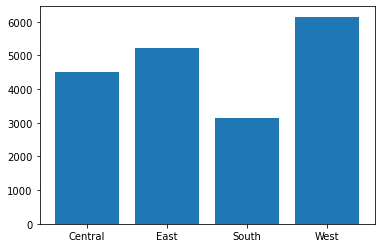

In [35]:
plt.bar(Region, total_quantity_each_region)
plt.xlabel('Part')
plt.ylabel('Total Quantity')
plt.show()

In [48]:
total_quantity_each_category = data.groupby(['Category']).sum()['Real_Sales']
total_quantity_each_category

Category
Furniture          618483.254259
Office Supplies    642642.091400
Technology         713229.420300
Name: Real_Sales, dtype: float64

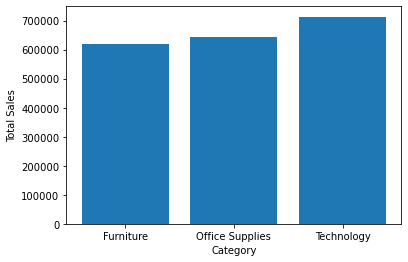

In [50]:
Category=['Furniture','Office Supplies','Technology']
plt.bar(Category, total_quantity_each_category)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

In [127]:
total_sales_each_subcategory = data.groupby(['Sub-Category']).sum()['Real_Sales']
total_sales_each_subcategory

Sub-Category
Accessories     67962.089200
Appliances      48515.106800
Art             14013.016800
Binders         79474.662800
Bookcases       44835.518701
Chairs         141817.969000
Copiers         57825.186000
Envelopes        8501.728400
Fasteners        1508.196000
Furnishings     43441.588400
Labels           4859.461600
Machines        62197.733000
Paper           35249.342400
Phones         137784.066800
Storage        101474.831200
Supplies        11668.011200
Tables          81280.665200
Name: Real_Sales, dtype: float64

TypeError: 'str' object is not callable

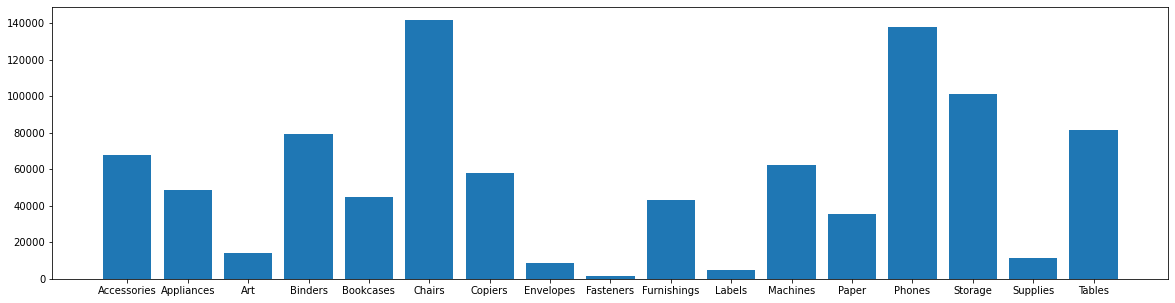

In [128]:
plt.figure(figsize=(20,5))
plt.bar(total_quantity_each_subcategory.index, total_quantity_each_subcategory)
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.show()

In [105]:
df_subcategory = data[['Category','Region','Quantity']]
df_groupby = df_subcategory.groupby(['Category','Region']).sum().sort_values("Quantity", ascending=False)
df_groupby

Quantity
Category        Region           
Office Supplies West         3563
                East         3252
                Central      2848
                South        1903
Furniture       West         1494
Technology      West         1092
Furniture       East         1086
                Central       917
Technology      East          894
                Central       752
Furniture       South         716
Technology      South         523

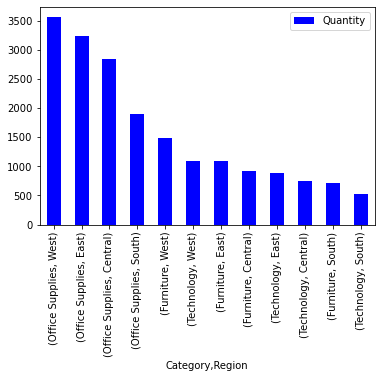

In [106]:
df_groupby.plot.bar(color = "blue")

from the figure above,we can konw that the office supplies in the west has the highest sales. and the Technology in South area has the lowest sales. 

### relation between Sub-Category, Quantity and Price

In [107]:
data['Price'] = data['Sales'] / data['Quantity']

In [108]:
prices = data[['Sub-Category', 'Quantity']]
pricegp = prices.groupby(["Sub-Category"]).sum().sort_values("Quantity",ascending = False)

In [109]:
subcategory_group = data.groupby('Sub-Category')
quantity_order = subcategory_group.sum()['Quantity']
category = [category for category, df in subcategory_group]

In [110]:
prices = data.groupby ('Sub-Category').mean()['Price']

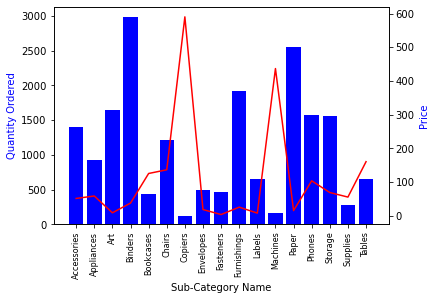

In [114]:
ig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(category,quantity_order, color="blue")
ax2.plot(category,prices, 'r-')

ax1.set_xlabel('Sub-Category Name')
ax1.set_ylabel ('Quantity Ordered', color="blue")
ax2.set_ylabel('Price', color='blue')
ax1.set_xticklabels (category, rotation = "vertical", size = 8)
plt.show()